In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial import distance
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
df = pd.read_csv("../../datasets/Complete.csv", sep=';', header=None, names=["x", "y"])


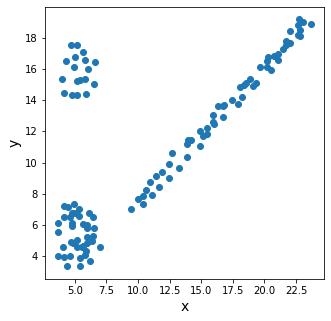

In [31]:
fields = ["x", "y"]
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel(fields[0], fontsize=14)
ax.set_ylabel(fields[1], fontsize=14)
ax.scatter(df[fields[0]], df[fields[1]])
plt.show()

In [32]:
df["label"] = df.index

In [33]:
df

,x,y,label
0,4.657258,4.886364,0
1,3.689516,5.535714,1
2,3.689516,3.993506,2
3,4.415323,3.344156,3
4,5.443548,3.344156,4
...,...,...,...
112,22.838710,18.077922,112
113,22.838710,18.467532,113
114,22.645161,18.818182,114
115,23.070968,18.974026,115


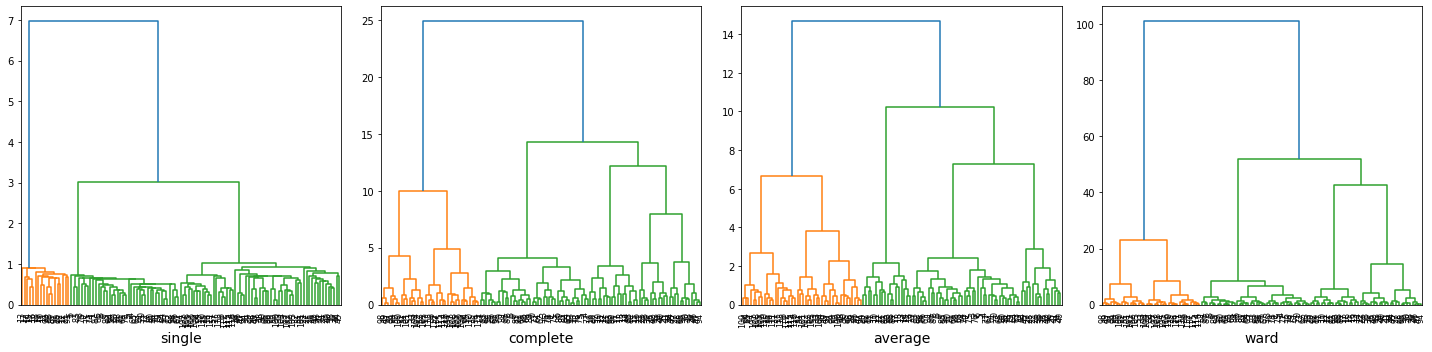

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ms = ['single', 'complete', 'average', 'ward']
dms = []
Zs = []
for m, ax in zip(ms, axs) :
    dm = pdist(df[["x", "y"]], metric='euclidean') #single, complete, average, and ward
    dms.append(dm)
    Z = linkage(dm, method=m)#single, complete, average, and ward
    d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=8, leaf_rotation=90, ax=ax)

    ax.set_xlabel(m, fontsize=14)
    Zs.append(Z)


plt.tight_layout()
plt.show()


Silouette score para  single = 0.6314187617980042


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\3247074241.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


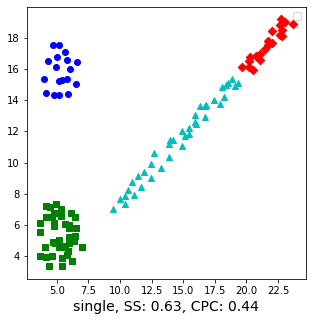

Silouette score para  complete = 0.6693038872155005


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\3247074241.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


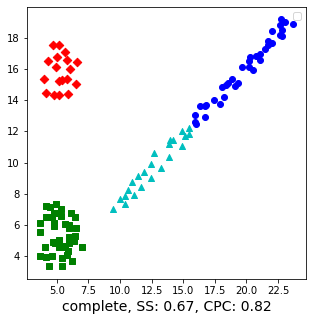

Silouette score para  average = 0.632111296283838


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\3247074241.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


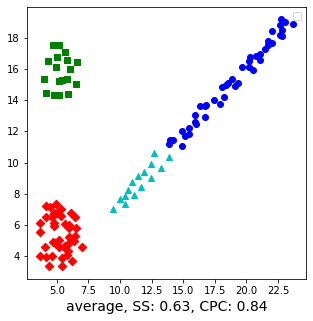

Silouette score para  ward = 0.6693038872155005


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\3247074241.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


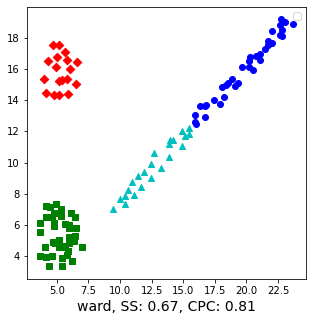

In [35]:
cgrupos = 4
ms = ['single', 'complete', 'average', 'ward']
for m, Z in zip(ms, Zs):
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=df.index)
    df["Cluster"] = memb

    ss = metrics.silhouette_score(df[fields], labels=memb, metric='euclidean')
    print("Silouette score para ", m, "=", ss)

    uet = np.unique(df["Cluster"])
    X=df
    fig, ax = plt.subplots(figsize=(5, 5))
    i = 0
    for e in uet:
        x = X[X["Cluster"]==e][fields[0]]
        y = X[X["Cluster"]==e][fields[1]]
        for index, row in X[X["Cluster"]==e].iterrows():
            ax.scatter(row[fields[0]],row[fields[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        cpc, cp = cophenet(linkage(dm, method=m), dm)
        ax.set_xlabel(m+", SS: "+"{:2.2f}".format(ss)+", CPC: "+"{:2.2f}".format(cpc), fontsize=14)       
        i+=1
        #plt.scatter(x, y, marker=markers[e%len(markers)], color=colors[e%len(colors)], label='Group'+str(e))
    plt.legend()
    plt.show()


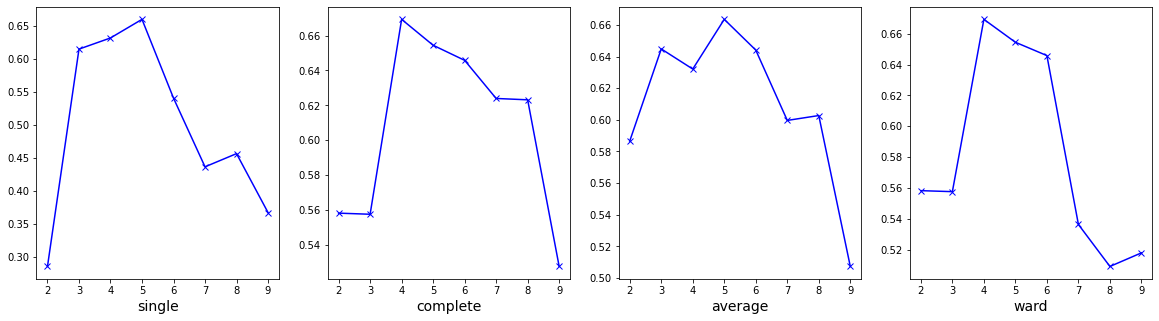

El maximo valor esta en  complete 4


In [36]:
groups = range(2,10,1)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

ms = ['single', 'complete', 'average', 'ward']
results = []
ssmax = ('', 0, None, None, -1)
sscores = []

for m, mv, ax in zip(ms, range(0,4), axs):
    sscores = []
    for i in groups:
        dm = pdist(df[fields], metric='euclidean') #single, complete, average, and ward
        Z = linkage(dm, method=m)#single, complete, average, and ward
        memb = fcluster(Z, i, criterion='maxclust')
        df["cluster_"+m+"_"+str(i)] = memb
        ss = metrics.silhouette_score(df[fields], labels=memb, metric='euclidean')
        val = (m, i, dm, Z, ss)
        results.append(val)
        if val[4]>ssmax[4]:
            ssmax = val
        sscores.append(ss)
    
    ax.plot(groups,sscores,'bx-')
    ax.set_xlabel(m, fontsize=14)
        
plt.show()

print("El maximo valor esta en ", ssmax[0], ssmax[1])

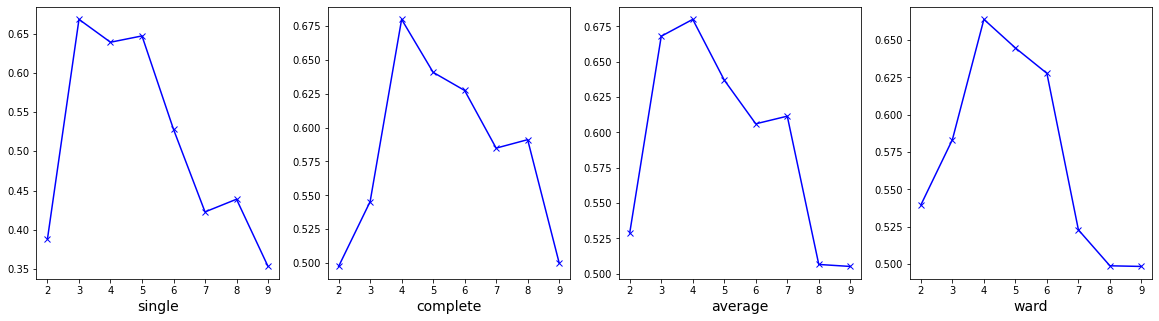

El maximo valor esta en  complete 4 y es de  0.6799517988062189


In [37]:
def distancia_del_rey(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return max(abs(x1 - x2), abs(y1 - y2))

groups = range(2,10,1)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

ms = ['single', 'complete', 'average', 'ward']
results = []
ssmax = ('', 0, None, None, -1)
sscores = []
Zs = []
for m, mv, ax in zip(ms, range(0,4), axs):
    sscores = []
    Z = linkage(dm, method=m)#single, complete, average, and ward
    for i in groups:
        dm = pdist(df[fields], metric=distancia_del_rey) #single, complete, average, and ward
        memb = fcluster(Z, i, criterion='maxclust')
        df["cluster_"+m+"_"+str(i)] = memb
        ss = metrics.silhouette_score(df[fields], labels=memb, metric=distancia_del_rey)
        val = (m, i, dm, Z, ss)
        results.append(val)
        if val[4]>ssmax[4]:
            ssmax = val
        sscores.append(ss)
    Zs.append(Z)
    
    ax.plot(groups,sscores,'bx-')
    ax.set_xlabel(m, fontsize=14)
        
plt.show()

print("El maximo valor esta en ", ssmax[0], ssmax[1], "y es de ", ssmax[4])

Silouette score para  single = 0.6680189745792258


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\1397003113.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


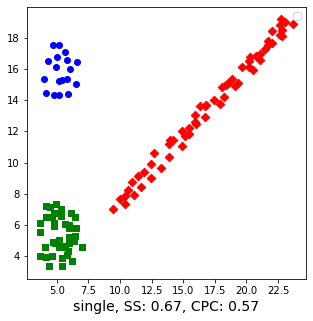

Silouette score para  complete = 0.5453364172947581


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\1397003113.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


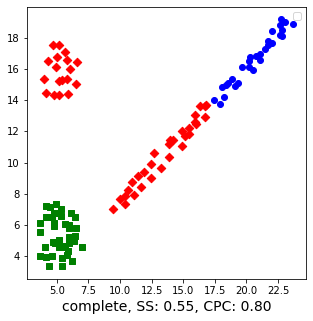

Silouette score para  average = 0.6680189745792258


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\1397003113.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


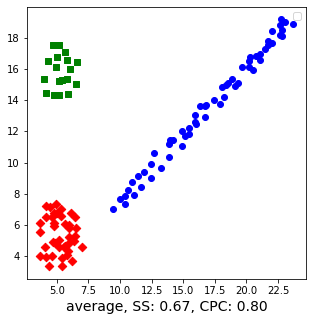

Silouette score para  ward = 0.5832579459692241


C:\Users\pabli\AppData\Local\Temp\ipykernel_252\1397003113.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


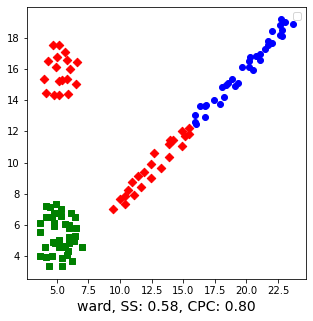

In [38]:
cgrupos = 3
ms = ['single', 'complete', 'average', 'ward']
for m, Z in zip(ms, Zs):
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=df.index)
    df["Cluster"] = memb

    ss = metrics.silhouette_score(df[fields], labels=memb, metric=distancia_del_rey)
    print("Silouette score para ", m, "=", ss)

    uet = np.unique(df["Cluster"])
    X=df
    fig, ax = plt.subplots(figsize=(5, 5))
    i = 0
    for e in uet:
        x = X[X["Cluster"]==e][fields[0]]
        y = X[X["Cluster"]==e][fields[1]]
        for index, row in X[X["Cluster"]==e].iterrows():
            ax.scatter(row[fields[0]],row[fields[1]], marker=markers[i%len(markers)], color=colors[i%len(colors)])
        
        cpc, cp = cophenet(linkage(dm, method=m), dm)

        
        ax.set_xlabel(m+", SS: "+"{:2.2f}".format(ss)+", CPC: "+"{:2.2f}".format(cpc), fontsize=14)    
        i+=1
        #plt.scatter(x, y, marker=markers[e%len(markers)], color=colors[e%len(colors)], label='Group'+str(e))
    plt.legend()
    plt.show()

In [23]:
from scipy.spatial import distance

# Obtén la lista de todas las métricas de distancia disponibles
all_distance_metrics = distance._METRICS.keys()

# Imprime la lista de métricas de distancia
for metric in all_distance_metrics:
    print(metric)

    

braycurtis
canberra
chebyshev
cityblock
correlation
cosine
dice
euclidean
hamming
jaccard
jensenshannon
kulczynski1
mahalanobis
minkowski
rogerstanimoto
russellrao
seuclidean
sokalmichener
sokalsneath
sqeuclidean
yule
